In [206]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
import sys
import os
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt

sys.path.append("..") # Adds higher directory to python modules path.
from src.networks.cnn import simple_cnn

In [10]:
weights_folder = '../weights'
data_folder = '..'
weights_file_name = 'small-cnn-08-1.00.hdf5'
weights_path = os.path.join(weights_folder, weights_file_name)

In [12]:
INPUT_IMG_SIZE = (160, 160)
model = simple_cnn(INPUT_IMG_SIZE)
model.load_weights(weights_path)

In [104]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        os.path.join(data_folder, 'data/dev'),
        target_size=INPUT_IMG_SIZE,
        batch_size=batch_size,
        shuffle=False,
        class_mode='binary')

dataset_size = 9999
steps = dataset_size // batch_size
X = []
y = []
for (idx, (batch_x, batch_y)) in enumerate(validation_generator):
    X.append(batch_x)
    y.append(batch_y)
    print(idx, "/", steps)
    if idx >= steps:
        break
    
X = np.concatenate(X)
y = np.concatenate(y)

Found 9999 images belonging to 2 classes.
0 / 312
1 / 312
2 / 312
3 / 312
4 / 312
5 / 312
6 / 312
7 / 312
8 / 312
9 / 312
10 / 312
11 / 312
12 / 312
13 / 312
14 / 312
15 / 312
16 / 312
17 / 312
18 / 312
19 / 312
20 / 312
21 / 312
22 / 312
23 / 312
24 / 312
25 / 312
26 / 312
27 / 312
28 / 312
29 / 312
30 / 312
31 / 312
32 / 312
33 / 312
34 / 312
35 / 312
36 / 312
37 / 312
38 / 312
39 / 312
40 / 312
41 / 312
42 / 312
43 / 312
44 / 312
45 / 312
46 / 312
47 / 312
48 / 312
49 / 312
50 / 312
51 / 312
52 / 312
53 / 312
54 / 312
55 / 312
56 / 312
57 / 312
58 / 312
59 / 312
60 / 312
61 / 312
62 / 312
63 / 312
64 / 312
65 / 312
66 / 312
67 / 312
68 / 312
69 / 312
70 / 312
71 / 312
72 / 312
73 / 312
74 / 312
75 / 312
76 / 312
77 / 312
78 / 312
79 / 312
80 / 312
81 / 312
82 / 312
83 / 312
84 / 312
85 / 312
86 / 312
87 / 312
88 / 312
89 / 312
90 / 312
91 / 312
92 / 312
93 / 312
94 / 312
95 / 312
96 / 312
97 / 312
98 / 312
99 / 312
100 / 312
101 / 312
102 / 312
103 / 312
104 / 312
105 / 312
106 / 31

In [109]:
ev = model.evaluate(X, y)

313/313 [==============================] - 34s 107ms/step - loss: 0.0163 - accuracy: 0.9952


In [193]:
preds = model.predict(X, verbose=1)
wrongs_imgs = X[np.argwhere(y.reshape(len(y), 1) != np.round(preds))[:, 0], :, :, :]
correct_labels = y[np.argwhere(y.reshape(len(y), 1) != np.round(preds))[:, 0]]
wrong_preds = preds[np.argwhere(y.reshape(len(y), 1) != np.round(preds))[:, 0]]

0.0 [0.6255179]


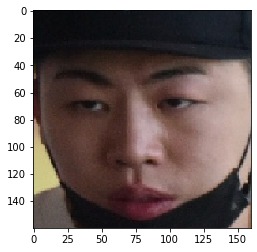

0.0 [0.9597734]


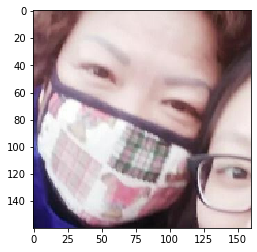

0.0 [0.9729917]


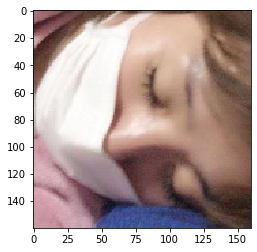

0.0 [0.98032355]


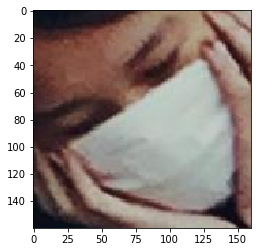

0.0 [0.74997294]


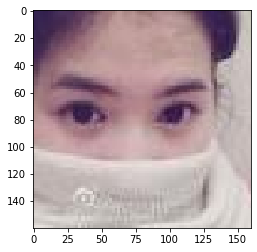

0.0 [0.625088]


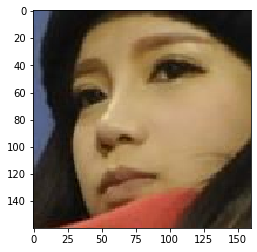

0.0 [0.98969066]


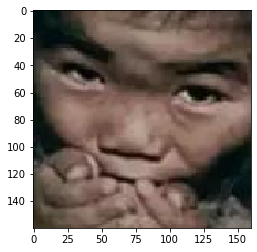

0.0 [0.88355595]


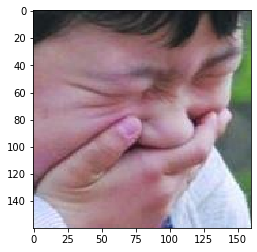

0.0 [0.55999404]


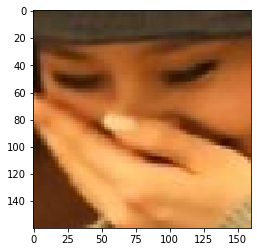

0.0 [0.8195902]


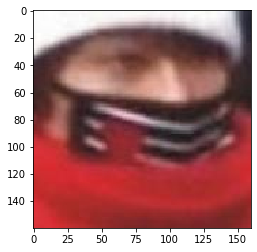

0.0 [0.7506706]


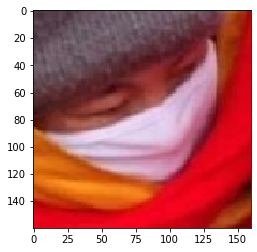

0.0 [0.676788]


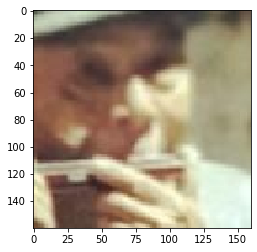

0.0 [0.8069362]


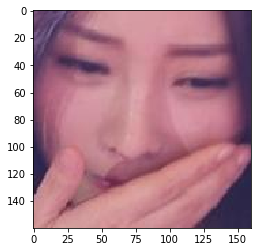

0.0 [0.9998663]


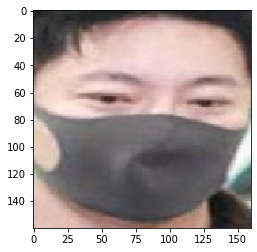

0.0 [0.8503607]


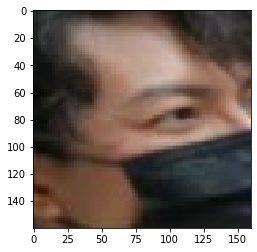

0.0 [0.99682236]


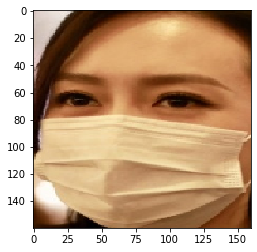

0.0 [0.83836526]


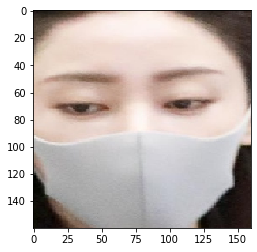

0.0 [0.9976063]


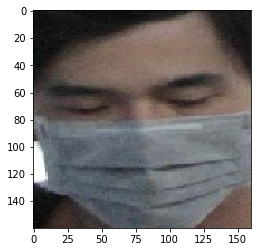

0.0 [0.8267778]


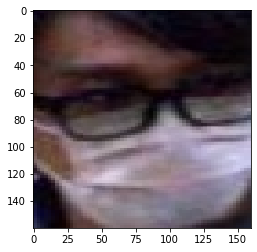

1.0 [0.02977908]


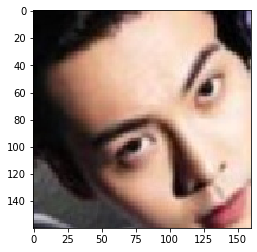

1.0 [0.01257929]


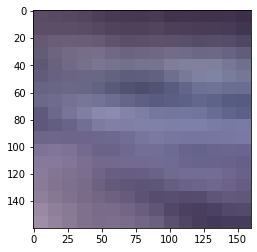

1.0 [0.48231593]


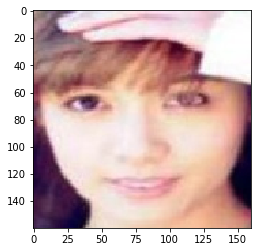

1.0 [0.01870918]


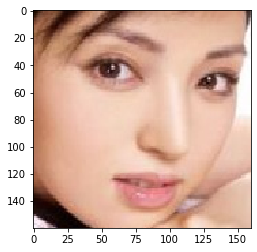

1.0 [0.01370662]


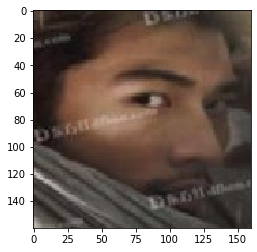

1.0 [0.02180701]


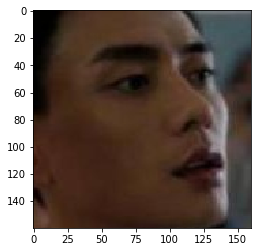

1.0 [0.00520498]


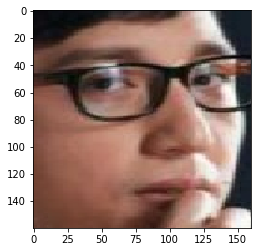

1.0 [0.01577356]


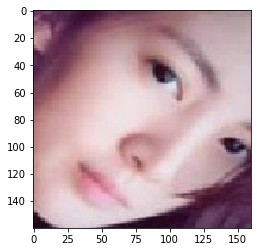

1.0 [0.19908547]


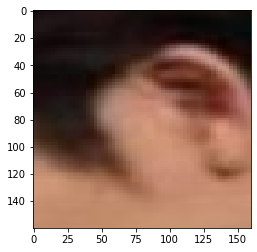

1.0 [0.1498009]


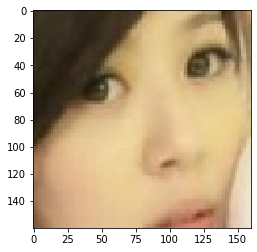

1.0 [0.20754108]


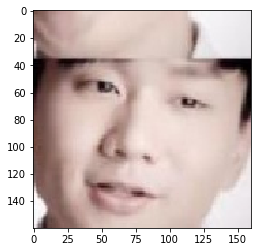

1.0 [0.08842319]


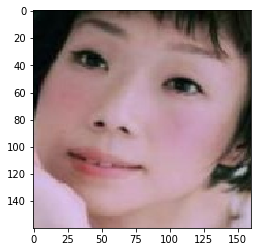

1.0 [0.23843846]


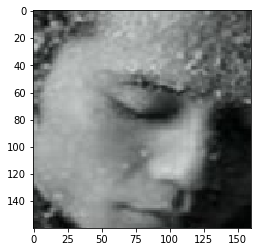

1.0 [0.4381088]


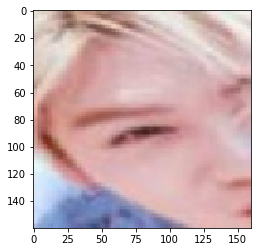

1.0 [0.00041473]


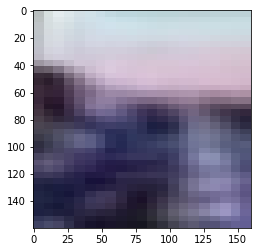

1.0 [0.3748972]


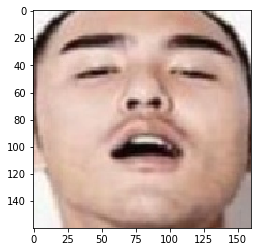

1.0 [0.3375783]


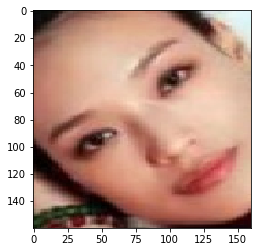

1.0 [0.41324693]


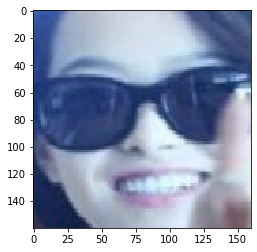

1.0 [0.11643231]


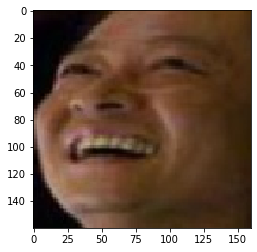

1.0 [0.00154534]


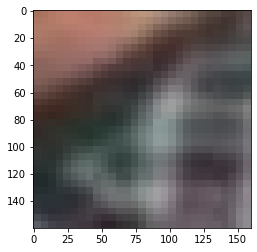

1.0 [0.16069973]


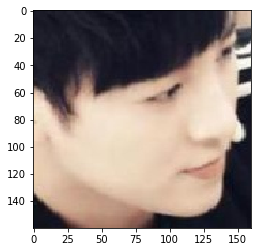

1.0 [0.00115705]


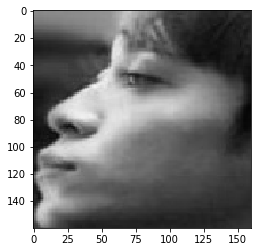

1.0 [0.29365963]


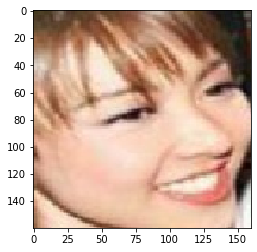

1.0 [0.02301049]


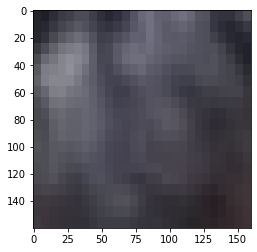

1.0 [0.3965854]


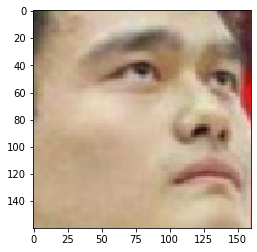

1.0 [0.4208331]


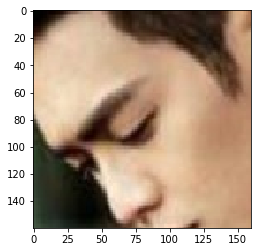

1.0 [0.3040502]


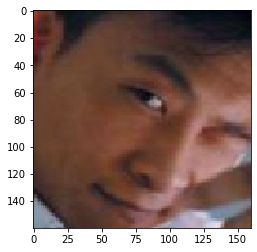

1.0 [0.00188631]


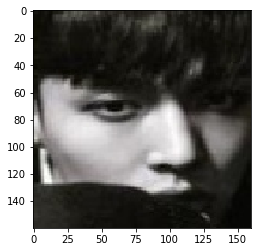

1.0 [0.38509482]


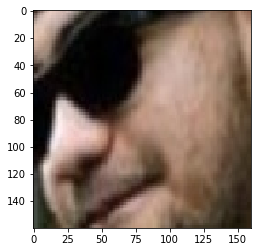

In [207]:
for idx in range(len(wrongs_imgs)):
    print(correct_labels[idx], wrong_preds[idx])
    imshow(wrongs[idx])
    plt.show()

In [201]:
len(wrongs_imgs)

48